In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
triplets = pd.read_csv('D:/CS608 Project/train_triplets.txt', names=['user_id', 'song_id', 'play_count'], header=None, sep='\t')
songs = pd.read_csv('D:/CS608 Project/songs.csv')
artist_mbtag = pd.read_csv('D:/CS608 Project/artist_mbtag.csv')
artist_term = pd.read_csv('D:/CS608 Project/artist_term.csv')
lyrics = pd.read_csv('D:/CS608 Project/lyrics.csv')

In [96]:
triplets

,user_id,song_id,play_count,group_play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,1
...,...,...,...,...
48373581,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2,2
48373582,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1,1
48373583,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1,1
48373584,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3,3


In [10]:
# songid=pd.DataFrame(triplets['song_id'].unique())
# songid.columns = ['song_id']
# songid
# songid.to_csv('songid.csv', index=False, header=True)

,song_id
0,SOAKIMP12A8C130995
1,SOAPDEY12A81C210A9
2,SOBBMDR12A8C13253B
3,SOBFNSP12AF72A0E22
4,SOBFOVM12A58A7D494
...,...
384541,SOJLGCD12A6D4F4A7C
384542,SONYEUK12A8C13E9A4
384543,SOUSSCZ12A8C131D83
384544,SOKSHWF12AB018B8CC


## Some Statistics of Triplets

In [182]:
triplets[['play_count']].describe()

,play_count
count,4.837359e+07
mean,2.866859e+00
std,6.437725e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.667000e+03


In [13]:
n_users = triplets.user_id.nunique()
n_songs = triplets.song_id.nunique()
n_ratings = len(triplets)
rating_matrix_size = n_users * n_songs
sparsity = 1 - n_ratings / rating_matrix_size

print(f"Number of users: {n_users}")
print(f"Number of items: {n_songs}")
print(f"Number of available ratings: {n_ratings}")
print(f"Number of all possible ratings: {rating_matrix_size}")
print("-" * 40)
print(f"SPARSITY: {sparsity * 100.0:.2f}%")

Number of users: 1019318
Number of items: 384546
Number of available ratings: 48373586
Number of all possible ratings: 391974659628
----------------------------------------
SPARSITY: 99.99%


In [239]:
song_per_user = triplets['song_id'].groupby(triplets['user_id']).count()
print('Maximum number of songs listened by a user:', song_per_user.max())
print('Minimum number of songs listened by a user:', song_per_user.min())
print('Average number of songs listened by a user:', song_per_user.mean())

Maximum number of songs listened by a user: 4400
Minimum number of songs listened by a user: 10
Average number of songs listened by a user: 47.45681524313316


In [240]:
user_per_song = triplets['user_id'].groupby(triplets['song_id']).count()
print('Maximum number of users who listened the song:', user_per_song.max())
print('Minimum number of users who listened the song:', user_per_song.min())
print('Average number of users who listened the song:', user_per_song.mean())

Maximum number of users who listened the song: 110479
Minimum number of users who listened the song: 1
Average number of users who listened the song: 125.79401684063805


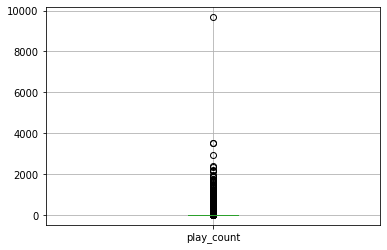

In [207]:
triplets.boxplot(column = 'play_count')
plt.show()

In [33]:
play_count_song = triplets[['play_count']].groupby(triplets['song_id']).sum()
play_count_song.columns = ['sum_play_count']
play_count_song = play_count_song.reset_index()
play_count_song = play_count_song.sort_values('sum_play_count', ascending=False)
play_count_song

,song_id,sum_play_count
25043,SOBONKR12A58A7A7E0,726885
12936,SOAUWYT12A81C206F1,648239
287415,SOSXLTC12AF72A7F54,527893
90798,SOFRQTD12A81C233C0,425463
67917,SOEGIYH12A6D4FC0E3,389880
...,...,...
39627,SOCMFLA12A6D4FA417,1
156718,SOJYBHV12A6D4F9A92,1
39625,SOCMFIS12A58291D8C,1
109970,SOGXJKU12A6D4F6D9F,1


In [12]:
play_count_song.describe()

,sum_play_count
count,384546.000000
mean,360.633690
std,3256.809395
min,1.000000
25%,8.000000
50%,32.000000
75%,133.000000
max,726885.000000


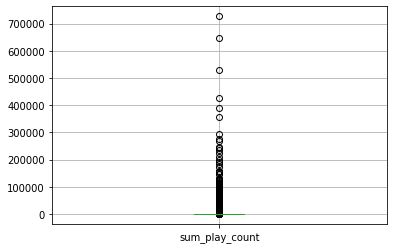

In [15]:
paly_count_song.boxplot(column = 'sum_play_count')
plt.show()

In [55]:
import pyecharts
from pyecharts import options as opts
from pyecharts.globals import ThemeType
# print(pyecharts.__version__)
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

from pyecharts.charts import Bar
x=list(play_count_song['song_id'].groupby(play_count_song['sum_play_count']).count().keys())
y=list(play_count_song['song_id'].groupby(play_count_song['sum_play_count']).count())

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='900px',height='400px'))
    .add_xaxis(x)
    .add_yaxis('Count of songs',y, yaxis_index=0, label_opts=opts.LabelOpts(is_show=False, position="top"))
    .extend_axis(yaxis=opts.AxisOpts(type_="value", name="Count of songs", min_=0, max_='auto', position="left"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Histogram of Songs' Total Play Count", subtitle=''))
)
bar.render_notebook()

In [17]:
quantile = list(play_count_song['sum_play_count'].sort_values(ascending=True))
quantile[int(384546*0.8)]

196

In [35]:
temp = []
for i in play_count_song['sum_play_count']:
    if i <=196:
        temp.append(i)
    else:
        temp.append('>196')
play_count_song['group_sum_play_count'] = temp

In [52]:
from pyecharts.charts import Bar
x=list(play_count_song[play_count_song['sum_play_count']<=196]['song_id'].groupby(play_count_song['group_sum_play_count']).count().keys())
y=list(play_count_song[play_count_song['sum_play_count']<=196]['song_id'].groupby(play_count_song['group_sum_play_count']).count())

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='900px',height='400px'))
    .add_xaxis(x)
    .add_yaxis('Count of songs',y, yaxis_index=0, label_opts=opts.LabelOpts(is_show=False, position="top"))
    .extend_axis(yaxis=opts.AxisOpts(type_="value", name="Count of songs", min_=0, max_='auto', position="left"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Histogram of 80% Songs' Total Play Count", subtitle=''))
)
bar.render_notebook()

In [3]:
paly_count_user = triplets[['play_count']].groupby(triplets['user_id']).max()
paly_count_user.columns = ['max_play_count']
paly_count_user = paly_count_user.reset_index()
paly_count_user

,user_id,max_play_count
0,00000b722001882066dff9d2da8a775658053ea0,2
1,00001638d6189236866af9bbf309ae6c2347ffdc,24
2,0000175652312d12576d9e6b84f600caa24c4715,4
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,2
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,2
...,...,...
1019313,ffffdc6c89988cd6119067769162948eacf8b670,11
1019314,ffffe07df4bb5fd929efe42c5728f3a0c1621277,1
1019315,fffff3e690fcda840b716ce7249d8935ff3323fc,10
1019316,fffff67d54a40927c93d03bd6c816b034b59f087,6


In [19]:
paly_count_user.describe()

,max_play_count
count,1.019318e+06
mean,1.657929e+01
std,2.974932e+01
min,1.000000e+00
25%,5.000000e+00
50%,9.000000e+00
75%,1.900000e+01
max,9.667000e+03


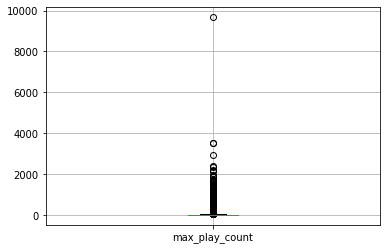

In [16]:
paly_count_user.boxplot(column = 'max_play_count')
plt.show()

In [26]:
quantile = list(paly_count_user['max_play_count'].sort_values(ascending=True))
quantile[int(1019318*0.8)]

23

In [4]:
temp = []
for i in paly_count_user['max_play_count']:
    if i <=23:
        temp.append(i)
    else:
        temp.append('>23')
paly_count_user['group_max_play_count'] = temp

In [8]:
from pyecharts.charts import Bar
x=list(paly_count_user[paly_count_user['max_play_count']<=23]['user_id'].groupby(paly_count_user['group_max_play_count']).count().keys())
y=list(paly_count_user[paly_count_user['max_play_count']<=23]['user_id'].groupby(paly_count_user['group_max_play_count']).count())

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='900px',height='400px'))
    .add_xaxis(x)
    .add_yaxis('Number of users',y, yaxis_index=0, label_opts=opts.LabelOpts(is_show=False, position="top"))
    .extend_axis(yaxis=opts.AxisOpts(type_="value", name="Number of users", min_=0, max_='auto', position="left"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Histogram of 80% Max Play Count", subtitle=''))
)
bar.render_notebook()

In [38]:
quantile2 = list(triplets['play_count'].sort_values(ascending=True))
quantile2[int(48373586*0.95)]

10

In [10]:
temp = []
for i in triplets['play_count']:
    if i <=10:
        temp.append(i)
    else:
        temp.append('>10')
triplets['group_play_count'] = temp

In [11]:
from pyecharts.charts import Bar
x=list(triplets['user_id'].groupby(triplets['group_play_count']).count().keys())
y=list(triplets['user_id'].groupby(triplets['group_play_count']).count())

bar = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.ROMA, width='900px',height='400px'))
    .add_xaxis(x)
    .add_yaxis('Number of users',y, yaxis_index=0, label_opts=opts.LabelOpts(is_show=False, position="top"))
    .extend_axis(yaxis=opts.AxisOpts(type_="value", name="Number of users", min_=0, max_='auto', position="left"))
    .set_global_opts(title_opts=opts.TitleOpts(title="Histogram of Play Count", subtitle=''))
)
bar.render_notebook()

## Map additional datasets to 'triplets'/songs metadata

In [56]:
songs

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRRIQAP128E07845D3,School Spirit Skit 1,SOZXGJK12A6701D913,The College Dropout,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,81.76281,0.877214,1.082503,2003,23434,-1,0
1,TRUEGXP128F92F7E6D,Say You Will,SOYIUDO12AB01838F5,808s & Heartbreak,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,377.57342,0.877214,1.082503,2008,3795262,-1,0
2,TRPQDHV128E07845CB,Graduation Day,SOWZAHB12AF72A4B46,The College Dropout,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,84.63628,0.877214,1.082503,2004,23426,-1,0
3,TRVZCPR128E0791599,Hey Mama,SOUXNNU12A67020A48,Late Registration,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,305.10975,0.877214,1.082503,2005,159452,-1,0
4,TRDDQBD128F428CDB4,Late,SOUXFVB12A8C1416D5,Late Registration,ARRH63Y1187FB47783,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,230.53016,0.877214,1.082503,2005,2417356,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384541,TRRFHVE12903CD475C,Bad Motherfucker,SOAAFKX12AB01855CE,Underground Hardcore_ vol. 2,ARWPOED1269FB356D6,NaN,Rude Awaking,237.81832,0.024628,0.000000,0,8504514,-1,0
384542,TRXANHP128F9310245,Ganesh Sound,SOAAERW12AB0183A37,Renunciation,ARAAF981187B9A43AB,b8fc61dd-182d-46b1-9a9a-4738cdafa2f7,David S. Ware Quartet,514.55955,0.370849,0.000000,0,5470444,-1,0
384543,TRFKWJW12903CD3E3F,De Tongbreker (Tineke Schouten & Linda de Mol),SOAAEFC12AB01852F1,16 Liedjes Uit De Tineke Schouten Shows,AR0EEUF1187B9AABED,f00b3c8a-f8a0-444e-8148-a83e377a2a61,Tineke Schouten,219.37587,0.064534,0.000000,0,8977759,-1,0
384544,TRNGYKL128F423CD16,Palabras De Gasolina,SOAADKA12A8AE48100,Cabron,AR2ERE41187B9B8B19,d922f74d-c16f-466a-8be5-5ade0b3de0ee,La Cabra Mecanica,200.72444,0.553563,0.000000,1999,1411155,-1,0


In [66]:
print(len(songs['song_id'].unique()), len(songs['song_id'].unique())/len(triplets['song_id'].unique()))
print((len(songs['song_id'].unique())/len(triplets['song_id'].unique()))*100,'% of triplets song_id are mapped with songs song_id.')

384546 1.0
100.0 % of triplets song_id are mapped with songs song_id.


In [20]:
artist_mbtag

,artist_id,mbtag
0,ARRH63Y1187FB47783,american
1,ARRH63Y1187FB47783,hip hop rnb and dance hall
2,ARRH63Y1187FB47783,hip-hop
3,ARRH63Y1187FB47783,producer
4,ARRH63Y1187FB47783,rapper
...,...,...
580978,ARVKZUL1187B99193A,circus punk
580979,ARVKZUL1187B99193A,indie rock
580980,ARVKZUL1187B99193A,punk cabaret
580981,ARVKZUL1187B99193A,punk rock


In [67]:
print(len(artist_mbtag['artist_id'].unique()), len(artist_mbtag['artist_id'].unique())/len(songs['artist_id'].unique()))
print(round((len(artist_mbtag['artist_id'].unique())/len(songs['artist_id'].unique()))*100,2),'% of songs artist_id are mapped with artist_mbtag artist_id.')

7714 0.2525619618243133
25.26 % of songs artist_id are mapped with artist_mbtag artist_id.


In [22]:
artist_term

,artist_id,term
0,ARRH63Y1187FB47783,alternative rap
1,ARRH63Y1187FB47783,beats
2,ARRH63Y1187FB47783,black
3,ARRH63Y1187FB47783,classic
4,ARRH63Y1187FB47783,club
...,...,...
11851167,AR2ERE41187B9B8B19,world
11851168,ARCIUWR1269FCD7D0A,czech republic
11851169,ARCIUWR1269FCD7D0A,neofolk
11851170,ARCIUWR1269FCD7D0A,rock


In [68]:
print(len(artist_term['artist_id'].unique()), len(artist_term['artist_id'].unique())/len(songs['artist_id'].unique()))
print(round((len(artist_term['artist_id'].unique())/len(songs['artist_id'].unique()))*100, 2),'% of songs artist_id are mapped with artist_term artist_id.')

30303 0.9921422257145663
99.21 % of songs artist_id are mapped with artist_term artist_id.


In [24]:
lyrics

,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0
...,...,...,...,...,...
11539415,TRZZZZD128F4236844,2466899,easili,1,1
11539416,TRZZZZD128F4236844,2466899,disast,1,1
11539417,TRZZZZD128F4236844,2466899,frown,1,1
11539418,TRZZZZD128F4236844,2466899,teas,1,1


In [70]:
print(len(lyrics['track_id'].unique()), len(lyrics['track_id'].unique())/len(songs['track_id'].unique()))
print(round((len(lyrics['track_id'].unique())/len(songs['track_id'].unique()))*100, 2), '% of songs track_id are mapped with lyrics track_id.')

142050 0.36939663915370335
36.94 % of songs track_id are mapped with lyrics track_id.


## Explore .db file

#### track_metadata

In [196]:
import sqlite3

In [197]:
conn = sqlite3.connect("D:/CS608 Project/track_metadata.db")
cursor = conn.cursor()
sql_1 = """select name from sqlite_master where type='table' order by name"""
cursor.execute(sql_1)
tables = cursor.fetchall()
print(tables)
# print(type(result))
# conn.close()

[('songs',)]


In [108]:
for t in tables:
    sql_2 = """pragma table_info('{}')""".format(t[0])
    cursor.execute(sql_2)
    cname = cursor.fetchall()
    print(cname)
    # print(type(cname))

    temp = []
    for i in cname:
        temp.append(i[1])
    print('Number of columns:',len(temp))

    sql_3 = """select * from {}""".format(t[0])
    cursor.execute(sql_3)
    record = cursor.fetchmany(5)

    locals()[t[0]] = pd.DataFrame()
    for i in record:
        locals()[t[0]] = locals()[t[0]].append([list(i)])

    locals()[t[0]].columns = temp
    locals()[t[0]] = locals()[t[0]].reset_index().drop(columns='index',axis=1)
    locals()[t[0]]

[(0, 'track_id', 'text', 0, None, 1), (1, 'title', 'text', 0, None, 0), (2, 'song_id', 'text', 0, None, 0), (3, 'release', 'text', 0, None, 0), (4, 'artist_id', 'text', 0, None, 0), (5, 'artist_mbid', 'text', 0, None, 0), (6, 'artist_name', 'text', 0, None, 0), (7, 'duration', 'real', 0, None, 0), (8, 'artist_familiarity', 'real', 0, None, 0), (9, 'artist_hotttnesss', 'real', 0, None, 0), (10, 'year', 'int', 0, None, 0), (11, 'track_7digitalid', 'int', 0, None, 0), (12, 'shs_perf', 'int', 0, None, 0), (13, 'shs_work', 'int', 0, None, 0)]
Number of columns: 14


In [150]:
songs

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


#### artist_similarity

In [103]:
conn = sqlite3.connect("D:/CS608 Project/artist_similarity.db")
cursor = conn.cursor()
sql_1 = """select name from sqlite_master where type='table' order by name"""
cursor.execute(sql_1)
tables = cursor.fetchall()
print(tables)
# print(type(result))
# conn.close()

[('artists',), ('similarity',)]


In [104]:
for t in tables:
    sql_2 = """pragma table_info('{}')""".format(t[0])
    cursor.execute(sql_2)
    cname = cursor.fetchall()
    print(cname)
    # print(type(cname))

    temp = []
    for i in cname:
        temp.append(i[1])
    print('Number of columns:',len(temp))

    sql_3 = """select * from {}""".format(t[0])
    cursor.execute(sql_3)
    record = cursor.fetchmany(5)

    locals()[t[0]] = pd.DataFrame()
    for i in record:
        locals()[t[0]] = locals()[t[0]].append([list(i)])

    locals()[t[0]].columns = temp
    locals()[t[0]] = locals()[t[0]].reset_index().drop(columns='index',axis=1)
    locals()[t[0]]

[(0, 'artist_id', 'text', 0, None, 1)]
Number of columns: 1
[(0, 'target', 'text', 0, None, 0), (1, 'similar', 'text', 0, None, 0)]
Number of columns: 2


In [153]:
artists

,artist_id
0,AR002UA1187B9A637D
1,AR003FB1187B994355
2,AR006821187FB5192B
3,AR009211187B989185
4,AR009SZ1187B9A73F4


In [152]:
similarity

,target,similar
0,AR002UA1187B9A637D,ARQDOR81187FB3B06C
1,AR002UA1187B9A637D,AROHMXJ1187B989023
2,AR002UA1187B9A637D,ARAGWVR1187B9B749B
3,AR002UA1187B9A637D,AREQVWS1241B9CC0A4
4,AR002UA1187B9A637D,ARHBE351187FB3B0CD


#### artist_term

In [117]:
conn = sqlite3.connect("D:/CS608 Project/artist_term.db")
cursor = conn.cursor()
sql_1 = """select name from sqlite_master where type='table' order by name"""
cursor.execute(sql_1)
tables = cursor.fetchall()
print(tables)
# print(type(result))
# conn.close()

[('artist_mbtag',), ('artist_term',), ('artists',), ('mbtags',), ('terms',)]


In [118]:
for t in tables:
    sql_2 = """pragma table_info('{}')""".format(t[0])
    cursor.execute(sql_2)
    cname = cursor.fetchall()
    print(cname)
    # print(type(cname))

    temp = []
    for i in cname:
        temp.append(i[1])
    print('Number of columns:',len(temp))

    sql_3 = """select * from {}""".format(t[0])
    cursor.execute(sql_3)
    record = cursor.fetchmany(5)

    locals()[t[0]] = pd.DataFrame()
    for i in record:
        locals()[t[0]] = locals()[t[0]].append([list(i)])

    locals()[t[0]].columns = temp
    locals()[t[0]] = locals()[t[0]].reset_index().drop(columns='index',axis=1)
    locals()[t[0]]

conn.close()

[(0, 'artist_id', 'text', 0, None, 0), (1, 'mbtag', 'text', 0, None, 0)]
Number of columns: 2
[(0, 'artist_id', 'text', 0, None, 0), (1, 'term', 'text', 0, None, 0)]
Number of columns: 2
[(0, 'artist_id', 'text', 0, None, 1)]
Number of columns: 1
[(0, 'mbtag', 'text', 0, None, 1)]
Number of columns: 1
[(0, 'term', 'text', 0, None, 1)]
Number of columns: 1


In [154]:
artist_mbtag

,artist_id,mbtag
0,AR002UA1187B9A637D,uk
1,AR002UA1187B9A637D,rock
2,AR002UA1187B9A637D,garage rock
3,AR006821187FB5192B,bass
4,AR00A6H1187FB5402A,detroit


In [155]:
artist_term

,artist_id,term
0,AR002UA1187B9A637D,garage rock
1,AR002UA1187B9A637D,country rock
2,AR002UA1187B9A637D,free jazz
3,AR002UA1187B9A637D,oi
4,AR002UA1187B9A637D,space rock


In [156]:
artists

,artist_id
0,AR002UA1187B9A637D
1,AR003FB1187B994355
2,AR006821187FB5192B
3,AR009211187B989185
4,AR009SZ1187B9A73F4


In [157]:
mbtags

,mbtag
0,00s
1,00s 10s
2,1 13 165900 150 7672 22647 34612 48720 59280 7...
3,1 7 186240 183 23558 41608 89158 111733 150833...
4,10s


In [158]:
terms

,term
0,00s
1,00s alternative
2,00s country
3,00s indie
4,00s pop


#### lastfm_similars

In [141]:
conn = sqlite3.connect("D:/CS608 Project/lastfm_similars.db")
cursor = conn.cursor()
sql_1 = """select name from sqlite_master where type='table' order by name"""
cursor.execute(sql_1)
tables = cursor.fetchall()
print(tables)
# print(type(result))
# conn.close()

[('similars_dest',), ('similars_dest_tmp',), ('similars_src',)]


In [142]:
for t in tables:
    if t[0] == 'similars_dest_tmp':
        continue
        
    sql_2 = """pragma table_info('{}')""".format(t[0])
    cursor.execute(sql_2)
    cname = cursor.fetchall()
    print(cname)
    # print(type(cname))

    temp = []
    for i in cname:
        temp.append(i[1])
    print('Number of columns:',len(temp))

    sql_3 = """select * from {}""".format(t[0])
    cursor.execute(sql_3)
    record = cursor.fetchmany(5)

    locals()[t[0]] = pd.DataFrame()
    for i in record:
        locals()[t[0]] = locals()[t[0]].append([list(i)])

    locals()[t[0]].columns = temp
    locals()[t[0]] = locals()[t[0]].reset_index().drop(columns='index',axis=1)
    locals()[t[0]]

conn.close()

[(0, 'tid', 'TEXT', 0, None, 0), (1, 'target', 'TEXT', 0, None, 0)]
Number of columns: 2
[(0, 'tid', 'TEXT', 0, None, 0), (1, 'target', 'TEXT', 0, None, 0)]
Number of columns: 2


In [159]:
similars_dest

,tid,target
0,TRPYHPC128F930F9B0,"TRHVKYA128F4289436,0.00100462,TRFONPG128F92FC0..."
1,TRJISWW128F42523F5,"TRJFNWV128F4224BE2,0.0120832,TRLCUYW128F932938..."
2,TRMEZLT128F425F0DB,"TRXBRDS12903CB2D9A,0.795339,TRMBEIK128F429B092..."
3,TRQODPB128F934C699,"TRJLOPB128F428CFE4,0.0411795,TRMHIHC12903CDF3D..."
4,TRBDOPE128F422C1EB,"TROUHQG128F425BF2B,0.00230093,TRAXWWD128F930A8..."


In [161]:
similars_src

,tid,target
0,TRCCCYE12903CFF0E9,"TRHZRQH128F92F9AC2,0.498053,TRZQUEN12903CBFFBB..."
1,TRCCCPM12903CBEEE5,"TRNRRXT12903CFAD5A,1,TRWVNWV12903CBEEE7,0.5238..."
2,TRCCCFH12903CEBC70,"TRRGGCN128F92E3579,0.646036,TRTVJGV128F424A147..."
3,TRCCCJT128F429FFF6,"TRZSKOT128F429FFFC,1,TRYVKKD12903CEB9E2,1,TRVC..."
4,TRCCCBJ128F4286E6F,"TRHUKZN128F428B2BD,1,TRMMPCY128F4253A20,0.9906..."


#### lastfm_tags

In [143]:
conn = sqlite3.connect("D:/CS608 Project/lastfm_tags.db")
cursor = conn.cursor()
sql_1 = """select name from sqlite_master where type='table' order by name"""
cursor.execute(sql_1)
tables = cursor.fetchall()
print(tables)
# print(type(result))
# conn.close()

[('tags',), ('tid_tag',), ('tids',)]


In [144]:
for t in tables:
    if t[0] == 'similars_dest_tmp':
        continue
        
    sql_2 = """pragma table_info('{}')""".format(t[0])
    cursor.execute(sql_2)
    cname = cursor.fetchall()
    print(cname)
    # print(type(cname))

    temp = []
    for i in cname:
        temp.append(i[1])
    print('Number of columns:',len(temp))

    sql_3 = """select * from {}""".format(t[0])
    cursor.execute(sql_3)
    record = cursor.fetchmany(5)

    locals()[t[0]] = pd.DataFrame()
    for i in record:
        locals()[t[0]] = locals()[t[0]].append([list(i)])

    locals()[t[0]].columns = temp
    locals()[t[0]] = locals()[t[0]].reset_index().drop(columns='index',axis=1)
    locals()[t[0]]

conn.close()

[(0, 'tag', 'TEXT', 0, None, 0)]
Number of columns: 1
[(0, 'tid', 'INT', 0, None, 0), (1, 'tag', 'INT', 0, None, 0), (2, 'val', 'FLOAT', 0, None, 0)]
Number of columns: 3
[(0, 'tid', 'TEXT', 0, None, 0)]
Number of columns: 1


In [162]:
tags

,tag
0,classic rock
1,Progressive rock
2,blues
3,memphis slim
4,pop


In [163]:
tid_tag

,tid,tag,val
0,1,1,100.0
1,1,2,100.0
2,2,3,100.0
3,2,4,100.0
4,3,5,100.0


In [164]:
tids

,tid
0,TRCCCYE12903CFF0E9
1,TRCCCFH12903CEBC70
2,TRCCCJT128F429FFF6
3,TRCCCBJ128F4286E6F
4,TRCCJTI128EF35394A


#### mxm_dataset

In [147]:
conn = sqlite3.connect("D:/CS608 Project/mxm_dataset.db")
cursor = conn.cursor()
sql_1 = """select name from sqlite_master where type='table' order by name"""
cursor.execute(sql_1)
tables = cursor.fetchall()
print(tables)
# print(type(result))
# conn.close()

[('lyrics',), ('words',)]


In [148]:
for t in tables:
    if t[0] == 'similars_dest_tmp':
        continue
        
    sql_2 = """pragma table_info('{}')""".format(t[0])
    cursor.execute(sql_2)
    cname = cursor.fetchall()
    print(cname)
    # print(type(cname))

    temp = []
    for i in cname:
        temp.append(i[1])
    print('Number of columns:',len(temp))

    sql_3 = """select * from {}""".format(t[0])
    cursor.execute(sql_3)
    record = cursor.fetchmany(5)

    locals()[t[0]] = pd.DataFrame()
    for i in record:
        locals()[t[0]] = locals()[t[0]].append([list(i)])

    locals()[t[0]].columns = temp
    locals()[t[0]] = locals()[t[0]].reset_index().drop(columns='index',axis=1)
    locals()[t[0]]

conn.close()

[(0, 'track_id', '', 0, None, 0), (1, 'mxm_tid', 'INT', 0, None, 0), (2, 'word', 'TEXT', 0, None, 0), (3, 'count', 'INT', 0, None, 0), (4, 'is_test', 'INT', 0, None, 0)]
Number of columns: 5
[(0, 'word', 'TEXT', 0, None, 1)]
Number of columns: 1


In [165]:
lyrics

,track_id,mxm_tid,word,count,is_test
0,TRAAAAV128F421A322,4623710,i,6,0
1,TRAAAAV128F421A322,4623710,the,4,0
2,TRAAAAV128F421A322,4623710,you,2,0
3,TRAAAAV128F421A322,4623710,to,2,0
4,TRAAAAV128F421A322,4623710,and,5,0


In [166]:
words

,word
0,i
1,the
2,you
3,to
4,and
